##導入的功能

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use( 'ggplot' ) 

##讀檔案

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/titanic.csv")
df=df.drop(1309)##這邊一直多讀一條空的行，但資料數共1309筆(0~1308)，所以用drop移除多的1309行
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


##大概算一下生存者的佔比

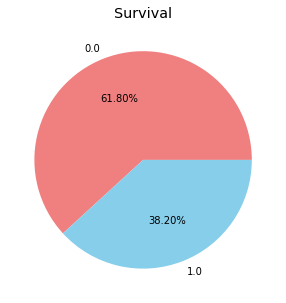

In [3]:
Survived_Counts = df['survived'].value_counts().reset_index()
Survived_Counts.columns = ['survived','counts']
Survived_Counts
plt.figure( figsize=(10,5) )
df['survived'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Survival' )  # 圖標題
plt.ylabel( '' )
plt.show()

看得出生存人數只占38.2%。

##那大概找一下，跟生存與否比較有關的欄位是哪些

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

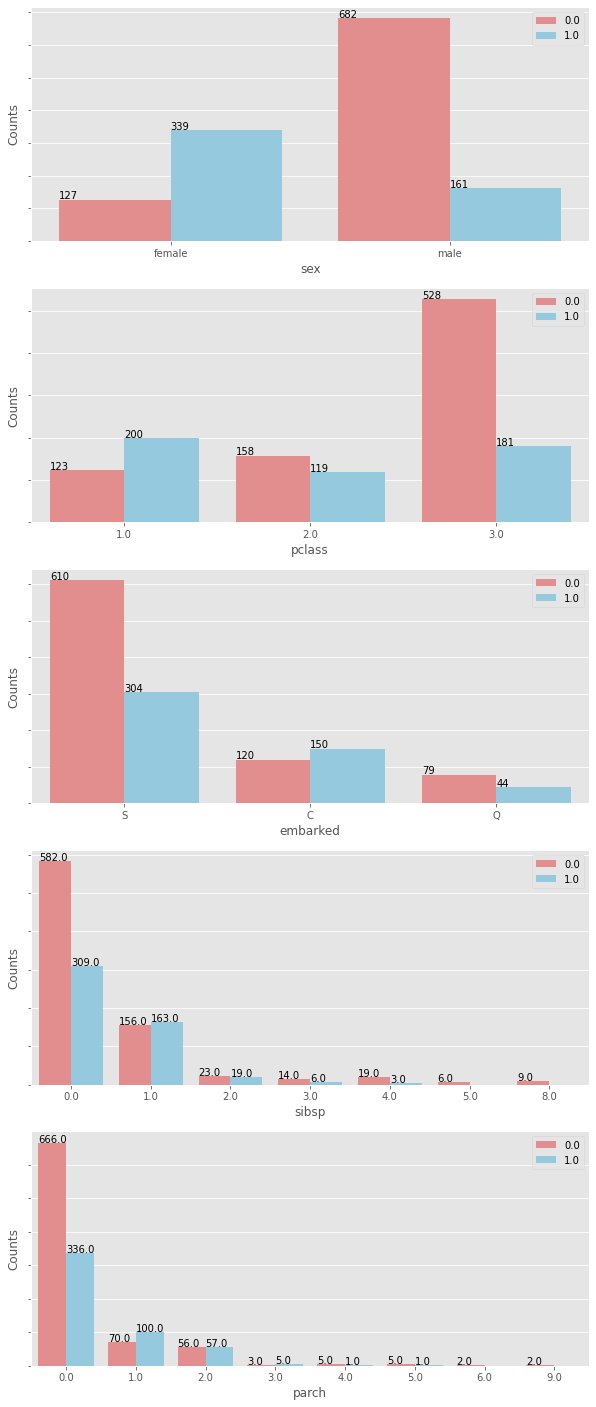

In [4]:
selected_cols = ['sex','pclass','embarked','sibsp','parch']

plt.figure( figsize=(10,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df[selected_cols] ) :        
    ax = plt.subplot( gs[i] )
    sns.countplot( df[col], hue=df.survived, palette=['lightcoral','skyblue'] )
    ax.set_yticklabels([])
    ax.set_ylabel( 'Counts' )
    ax.legend( loc=1 )   # upper right:1 ; upper left:2
    for p in ax.patches:
        ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()

圖示大概長上面這樣，如果用數值表示，就如下:

In [10]:
for col in selected_cols:
    l = ['survived']
    l.append(col) 
    Survival_Rate = df[l].groupby(by=col).mean().round(4).reset_index()
    Survival_Rate.columns = [col,'Survival Rate(%)']
    Survival_Rate['Survival Rate(%)'] = Survival_Rate['Survival Rate(%)'].map( lambda x:x*100 )
    display( Survival_Rate )

,sex,Survival Rate(%)
0,female,72.75
1,male,19.10


,pclass,Survival Rate(%)
0,1.0,61.92
1,2.0,42.96
2,3.0,25.53


,embarked,Survival Rate(%)
0,C,55.56
1,Q,35.77
2,S,33.26


,sibsp,Survival Rate(%)
0,0.0,34.68
1,1.0,51.10
2,2.0,45.24
3,3.0,30.00
4,4.0,13.64
5,5.0,0.00
6,8.0,0.00


,parch,Survival Rate(%)
0,0.0,33.53
1,1.0,58.82
2,2.0,50.44
3,3.0,62.50
4,4.0,16.67
5,5.0,16.67
6,6.0,0.00
7,9.0,0.00


sex的部分，女性的生存率明顯高於男性。

Pclass的生存率: 1 > 2 >3。

Embarked的生存率以 C 最高。

SibSp有 1 人同行時，則生存率較高。

Parch為 1~3 人時，有較高的生存率。

##整理一下欄位值

有些欄位值重複性很高，但值的長度比較長，
像name欄位就是了，長度比較長，
但有些稱謂重複很多次。
那做訓練模型又要把資料的缺漏值(像空的欄位)補齊。
然後有些資料要分類、合併。

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
sex = pd.Series( np.where( df.sex == 'male' , 1 , 0 ) , name = 'sex')

print(sex)

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64


sex欄位，女姓為0，男性為1

---


In [13]:
embarked = pd.get_dummies( df.embarked )
print(embarked)

      C  Q  S
0     0  0  1
1     0  0  1
2     0  0  1
3     0  0  1
4     0  0  1
...  .. .. ..
1304  1  0  0
1305  1  0  0
1306  1  0  0
1307  1  0  0
1308  0  0  1

[1309 rows x 3 columns]


將embarked的值，拆開來，有過幾種值，就有幾種屬性
這樣就有C,Q,S 3種。

---


In [14]:
pclass = pd.get_dummies(df.pclass)
print(pclass.head())

   1.0  2.0  3.0
0    1    0    0
1    1    0    0
2    1    0    0
3    1    0    0
4    1    0    0


關於pclass的處理跟embarked一樣，有幾種值，就幾種屬性。



---



In [15]:
imputed = pd.DataFrame()

imputed[ 'age' ] = df.age.fillna( df.age.mean() )

imputed[ 'fare' ]= df.fare.fillna( df.fare.mean() )
print(imputed.head())

       age      fare
0  29.0000  211.3375
1   0.9167  151.5500
2   2.0000  151.5500
3  30.0000  151.5500
4  25.0000  151.5500


這邊就是補上age,fare的空欄位，雖然fare的空欄位好像都用0填了，不過還是順便做一下。

---


In [16]:
df['Title'] = df.name.str.split(', ', expand=True)[1]
df['Title'] = df.Title.str.split('.', expand=True)[0]
df['Title'] = df.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer','Dona'], 0 ) #職稱或貴族名(?) = 0
df['Title'] = df.Title.replace( ['Ms'],1  )#女士 = 1
df['Title'] = df.Title.replace( ['Mme'],2  ) #母親 = 2
df['Title'] = df.Title.replace( ['Mrs'], 3 ) #已婚女士 = 3
df['Title'] = df.Title.replace( ['Miss','Mlle'], 4 ) #未婚女士 = 4
df['Title'] = df.Title.replace( ['Master'], 5 ) #Master = 5
df['Title'] = df.Title.replace( ['Mr'], 6 ) #男士 = 6
df['Title'].unique()


array([4, 5, 6, 3, 0, 2, 1])

網路上找的資料大多都是說，稱謂的一些屬性也有可能影響生存率。 像Dr醫生，或一些可以辨別男、女、女生是否已婚的稱呼之類的。 那值表示的稱謂，就已經打在上面註釋那了。


---



In [17]:
cabin = pd.DataFrame()
cabin['cabin'] = df.cabin.fillna('U')
cabin['cabin'] = cabin['cabin'].map(lambda c:c[0])
cabin = pd.get_dummies(cabin['cabin'])
cabin

,A,B,C,D,E,F,G,T,U
0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1304,0,0,0,0,0,0,0,0,1
1305,0,0,0,0,0,0,0,0,1
1306,0,0,0,0,0,0,0,0,1
1307,0,0,0,0,0,0,0,0,1


最後來處理一下cabin的欄位，用U補上缺失值。 然後取號碼的頭一字母當屬性。


---



In [18]:
df #來看一下現在的資料長怎樣

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",5
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,4
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,4
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,6
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,6


In [20]:
X = pd.concat([sex,embarked,pclass,imputed,cabin,df['sibsp'],df['parch'],df['Title']],axis=1) #(這邊我是幾乎把所有欄位都一起做模型，也可以調整想查找的比較)

#除了住址跟body以外的欄位，為X
##因為提供的檔案好像，body一大堆空值，如果說是體重，
#但太多空值了，我覺得跟生存的關聯性根本不大

##再來home.dest的部分，以理論上來說，住址跟生存有什麼關聯性?
#總不可能說，每個人都知道其他乘客的住址是什麼吧?

##像稱謂能得知的一些資訊、船艙位置、票價能夠買到的船位、
#或家人一同登船的人有哪些，這些我覺得關聯性比較大。

##那為啥不整理那兩個沒用到的欄位，如果home.dest我用name>title的方法，
#不但很繁瑣，也沒有效率，而且既然都不打算使用了，所以就不做了
y = df['survived']

##LogisticRegression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
cls = LogisticRegression()

In [25]:
cls.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
score1 = cross_val_score(cls,X_train,y_train,cv=5,scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  Future

In [29]:
print("accuracies: %s" % score1)
print("mean accuracy: %s" % np.mean(score1)) #LogisticRegression求出來的平均準備值

accuracies: [0.77664975 0.78061224 0.7755102  0.73979592 0.80102041]
mean accuracy: 0.7747177043406195


##貝氏

In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [44]:
nb_model = nb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [45]:
y_pred = nb_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [46]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [47]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[173  25]
 [ 65  65]]


In [48]:
from mlxtend.plotting import plot_confusion_matrix

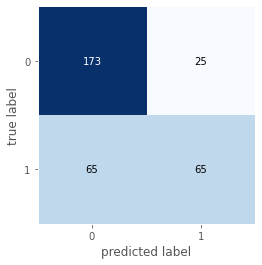

In [49]:
plot_confusion_matrix(confusion_matrix)
plt.show()

貝氏求出來的準確值

In [50]:
precision_score(y_test,y_pred)

0.7222222222222222

In [51]:
recall_score(y_test,y_pred) 

0.5

貝氏不管怎弄，感覺還是有問題，不然最後面，我X再用少一點的欄位參數跑一次看看

##決策樹

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [53]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7225609756097561

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6513409961685823

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
pipeline = Pipeline([('clf',DecisionTreeClassifier(criterion='entropy'))])

In [58]:
paremeter ={
  'clf__max_depth':(150,155,160), 
  'clf__min_samples_split':(2,3),
  'clf__min_samples_leaf':(1,2,3)

}

In [59]:
grid_search = GridSearchCV(pipeline,paremeter,n_jobs=-1,scoring='f1')

In [60]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(estimator=Pipeline(steps=[('clf',
                                        DecisionTreeClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': (150, 155, 160),
                         'clf__min_samples_leaf': (1, 2, 3),
                         'clf__min_samples_split': (2, 3)},
             scoring='f1')

In [61]:
grid_search.best_score_

0.6999544782176953

In [62]:
from sklearn.metrics import classification_report

In [63]:
pred = grid_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [64]:
print(classification_report(y_test,pred))#決策樹求出來的準確值

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       198
         1.0       0.69      0.68      0.68       130

    accuracy                           0.75       328
   macro avg       0.74      0.74      0.74       328
weighted avg       0.75      0.75      0.75       328



In [65]:
best_p = grid_search.best_estimator_.get_params()

In [67]:
for pn in sorted(paremeter.keys()):
  print('t%s : %r' % (pn,best_p[pn])) ##決策樹比較佳的超參數

tclf__max_depth : 150
tclf__min_samples_leaf : 3
tclf__min_samples_split : 3


##隨機森林

In [68]:
from sklearn.ensemble import RandomForestClassifier
clrf = RandomForestClassifier().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [69]:
pipeline_RF = Pipeline([('clf',RandomForestClassifier(criterion='entropy'))])

In [70]:
paremeter_RF ={
  'clf__n_estimators':(50,100,150),
  'clf__max_depth':(50,60,70), 
  'clf__min_samples_split':(2,3),
  'clf__min_samples_leaf':(1,2,3)}


In [71]:
grid_search_RF = GridSearchCV(pipeline_RF,paremeter_RF,n_jobs=-1)

In [72]:
grid_search_RF.fit(X_train,y_train)##每次跑這個，真的要跑一段時間= =

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': (50, 60, 70),
                         'clf__min_samples_leaf': (1, 2, 3),
                         'clf__min_samples_split': (2, 3),
                         'clf__n_estimators': (50, 100, 150)})

In [73]:
grid_search_RF.best_score_

0.8165181808764116

In [74]:
pred_RF = grid_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [75]:
print(classification_report(y_test,pred_RF)) ##隨機森林求出來的準確值

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       198
         1.0       0.69      0.68      0.68       130

    accuracy                           0.75       328
   macro avg       0.74      0.74      0.74       328
weighted avg       0.75      0.75      0.75       328



In [76]:
best_p_RF = grid_search_RF.best_estimator_.get_params()

In [78]:
for pn in sorted(paremeter_RF.keys()):
  print('t%s : %r' % (pn,best_p_RF[pn])) ##隨機森林比較佳的超參數

tclf__max_depth : 50
tclf__min_samples_leaf : 2
tclf__min_samples_split : 3
tclf__n_estimators : 150


##SVM

In [79]:
from sklearn.svm import SVC
clf_svc = SVC().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [80]:
pipeline_svc = Pipeline([('clf',SVC())])

In [81]:
paremeter_svc ={
  'clf__kernel':('linear','rbf','poly'),
  'clf__C':(1 ,10 )
}

In [82]:
grid_search_svc = GridSearchCV(pipeline_svc,paremeter_svc,n_jobs=-1,scoring='f1')

In [83]:
grid_search_svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(estimator=Pipeline(steps=[('clf', SVC())]), n_jobs=-1,
             param_grid={'clf__C': (1, 10),
                         'clf__kernel': ('linear', 'rbf', 'poly')},
             scoring='f1')

In [84]:
grid_search_svc.best_score_

0.6863793975616238

In [85]:
pred = grid_search_svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [86]:
print(classification_report(y_test,pred))##SVM求出來的準確值

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       198
         1.0       0.72      0.72      0.72       130

    accuracy                           0.78       328
   macro avg       0.77      0.77      0.77       328
weighted avg       0.78      0.78      0.78       328



In [87]:
best_p_svc = grid_search_svc.best_estimator_.get_params()

In [88]:
for pn in sorted(paremeter_svc.keys()):
  print('t%s : %r' % (pn,best_p_svc[pn])) ##SVM比較佳的超參數

tclf__C : 10
tclf__kernel : 'linear'


##稍微調整一下X的參數

其實網路上看的資料，影響比較大的就性別(sex男或女)、船艙之類的阿~
那我再加個登陸點(Embarked)。


---
這次就不把家人(父母、兄弟姊妹同船人數)、稱謂(Title)加入參考值了。


In [90]:
X = pd.concat([sex,embarked,pclass,imputed,cabin],axis=1) #忘記說，imputed是年齡跟fare

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [93]:
cls.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [94]:
score1 = cross_val_score(cls,X_train,y_train,cv=5,scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  Future

In [95]:
print("accuracies: %s" % score1)
print("mean accuracy: %s" % np.mean(score1)) #LogisticRegression求出來的平均準備值

accuracies: [0.8071066  0.80102041 0.76530612 0.78571429 0.81122449]
mean accuracy: 0.7940743810214441




---



---



---



In [101]:
nb = GaussianNB()

In [102]:
nb_model = nb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [103]:
y_pred = nb_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [108]:
precision_score(y_test,y_pred)

0.7009345794392523

In [109]:
recall_score(y_test,y_pred) #貝氏求出來的準確值，recall比前面那個高多了

0.646551724137931



---



---



In [110]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [111]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [112]:
accuracy_score(y_test,y_pred)

0.7408536585365854

In [113]:
f1_score(y_test,y_pred)

0.6255506607929516

In [115]:
pipeline = Pipeline([('clf',DecisionTreeClassifier(criterion='entropy'))])

In [116]:
paremeter ={
  'clf__max_depth':(150,155,160), 
  'clf__min_samples_split':(2,3),
  'clf__min_samples_leaf':(1,2,3)

}

In [117]:
grid_search = GridSearchCV(pipeline,paremeter,n_jobs=-1,scoring='f1')

In [118]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(estimator=Pipeline(steps=[('clf',
                                        DecisionTreeClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': (150, 155, 160),
                         'clf__min_samples_leaf': (1, 2, 3),
                         'clf__min_samples_split': (2, 3)},
             scoring='f1')

In [119]:
grid_search.best_score_

0.7102743116068317

In [121]:
pred = grid_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [122]:
print(classification_report(y_test,pred))#決策樹求出來的準確值

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       212
         1.0       0.63      0.63      0.63       116

    accuracy                           0.74       328
   macro avg       0.72      0.72      0.72       328
weighted avg       0.74      0.74      0.74       328



In [123]:
best_p = grid_search.best_estimator_.get_params()

In [124]:
for pn in sorted(paremeter.keys()):
  print('t%s : %r' % (pn,best_p[pn])) ##決策樹比較佳的超參數，做到這裡，其實準確值好像最多70上下

tclf__max_depth : 155
tclf__min_samples_leaf : 1
tclf__min_samples_split : 3




---



---



In [125]:
clrf = RandomForestClassifier().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [126]:
pipeline_RF = Pipeline([('clf',RandomForestClassifier(criterion='entropy'))])

In [127]:
paremeter_RF ={
  'clf__n_estimators':(50,100,150),
  'clf__max_depth':(50,60,70), 
  'clf__min_samples_split':(2,3),
  'clf__min_samples_leaf':(1,2,3)}


In [128]:
grid_search_RF = GridSearchCV(pipeline_RF,paremeter_RF,n_jobs=-1)

In [129]:
grid_search_RF.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': (50, 60, 70),
                         'clf__min_samples_leaf': (1, 2, 3),
                         'clf__min_samples_split': (2, 3),
                         'clf__n_estimators': (50, 100, 150)})

In [130]:
grid_search_RF.best_score_ 

0.813462136123485

80好高喔 看來鐵達尼也蠻適合用隨機森林建模型。

In [131]:
pred_RF = grid_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [132]:
print(classification_report(y_test,pred_RF)) ##隨機森林求出來的準確值

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       212
         1.0       0.63      0.63      0.63       116

    accuracy                           0.74       328
   macro avg       0.72      0.72      0.72       328
weighted avg       0.74      0.74      0.74       328



In [133]:
best_p_RF = grid_search_RF.best_estimator_.get_params()

In [134]:
for pn in sorted(paremeter_RF.keys()):
  print('t%s : %r' % (pn,best_p_RF[pn])) ##隨機森林比較佳的超參數

tclf__max_depth : 70
tclf__min_samples_leaf : 2
tclf__min_samples_split : 2
tclf__n_estimators : 50




---



---



In [135]:
clf_svc = SVC().fit(X_train,y_train)
pipeline_svc = Pipeline([('clf',SVC())])
paremeter_svc ={
  'clf__kernel':('linear','rbf','poly'),
  'clf__C':(1 ,10 )
}
grid_search_svc = GridSearchCV(pipeline_svc,paremeter_svc,n_jobs=-1,scoring='f1')
grid_search_svc.fit(X_train,y_train)##不跑個4~5分鐘不罷休
grid_search_svc.best_score_ 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7235966202891635

In [136]:
pred = grid_search_svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [137]:
print(classification_report(y_test,pred))##SVM求出來的準確值

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       212
         1.0       0.65      0.66      0.66       116

    accuracy                           0.75       328
   macro avg       0.73      0.73      0.73       328
weighted avg       0.75      0.75      0.75       328



In [138]:
best_p_svc = grid_search_svc.best_estimator_.get_params()
for pn in sorted(paremeter_svc.keys()):
  print('t%s : %r' % (pn,best_p_svc[pn])) ##SVM比較佳的超參數

tclf__C : 1
tclf__kernel : 'linear'


結論一下##
準確值真的大概落在70上下。
除了隨機森林那邊比較高，高到80多。
可能要用單個欄位去跟生存與否做模型再分開測。
一定有幾個特別高，有幾個可能較不相干。
光用上面做的那個長條圖，可信的程度可能不夠。
最後再把準確度比較高的幾個範本給取用，用那些欄位重跑一下，大概就比較高了。
還有關於父母或兄弟姊妹的同船數，有人好像有做合併，合併成家庭同船人數。
但我覺得這個好像，不太相干(?
不過作法也不難，只是我覺得用「父母或兄弟姊妹的同船數」就好。
如果有需要，可以額外在df建一個新的欄位來儲存家庭同船人數，像title那樣。